Zadanie na zajęciach polegało na minimalizacji kosztów pracy u pracowników.
Wartością modyfikowalną była obecność pracownika w pracy.



In [ ]:
from pulp import *

prob = LpProblem("Optymalizacja",LpMinimize)

AniaPon = LpVariable("Ania_w_poniedzialek", 0, 1, LpInteger)
AniaWt = LpVariable("Ania_we_wtorek", 0, 1, LpInteger)
AniaSr = LpVariable("Ania_w_srode", 0, 1, LpInteger)
AniaCzw = LpVariable("Ania_w_czwartek", 0, 1, LpInteger)
AniaPt = LpVariable("Ania_w_piatek", 0, 1, LpInteger)
StefanPon = LpVariable("Stefan_w_poniedzialek", 0, 1, LpInteger)
StefanWt = LpVariable("Stefan_we_wtorek", 0, 1, LpInteger)
StefanSr = LpVariable("Stefan_w_srode", 0, 1, LpInteger)
StefanCzw = LpVariable("Stefan_w_czwartek", 0, 1, LpInteger)
StefanPt = LpVariable("Stefan_w_piatek", 0, 1, LpInteger)
HektorPon = LpVariable("Hektor_w_poniedzialek", 0, 1, LpInteger)
HektorWt = LpVariable("Hektor_we_wtorek", 0, 1, LpInteger)
HektorSr = LpVariable("Hektor_w_srode", 0, 1, LpInteger)
HektorCzw = LpVariable("Hektor_w_czwartek", 0, 1, LpInteger)
HektorPt = LpVariable("Hektor_w_piatek", 0, 1, LpInteger)
OlafPon = LpVariable("Olaf_w_poniedzialek", 0, 1, LpInteger)
OlafWt = LpVariable("Olaf_we_wtorek", 0, 1, LpInteger)
OlafSr = LpVariable("Olaf_w_srode", 0, 1, LpInteger)
OlafCzw = LpVariable("Olaf_w_czwartek", 0, 1, LpInteger)
OlafPt = LpVariable("Olaf_w_piatek", 0, 1, LpInteger)
LidiaPon = LpVariable("Lidia_w_poniedzialek", 0, 1, LpInteger)
LidiaWt = LpVariable("Lidia_we_wtorek", 0, 1, LpInteger)
LidiaSr = LpVariable("Lidia_w_srode", 0, 1, LpInteger)
LidiaCzw = LpVariable("Lidia_w_czwartek", 0, 1, LpInteger)
LidiaPt = LpVariable("Lidia_w_piatek", 0, 1, LpInteger)
PiotrPon = LpVariable("Piotr_w_poniedzialek", 0, 1, LpInteger)
PiotrWt = LpVariable("Piotr_we_wtorek", 0, 1, LpInteger)
PiotrSr = LpVariable("Piotr_w_srode", 0, 1, LpInteger)
PiotrCzw = LpVariable("Piotr_w_czwartek", 0, 1, LpInteger)
PiotrPt = LpVariable("Piotr_w_piatek", 0, 1, LpInteger)

Ania_koszt = 100
Stefan_koszt = 50
Hektor_koszt = 60
Olaf_koszt = 40
Lidia_koszt = 110
Piotr_koszt = 70

prob += (AniaPon+AniaWt+AniaSr+AniaCzw+AniaPt)*Ania_koszt+(StefanPon+StefanWt+StefanSr+StefanCzw+StefanPt)*Stefan_koszt+(HektorPon+HektorWt+HektorSr+HektorCzw+HektorPt)*Hektor_koszt+(OlafPon+OlafWt+OlafSr+OlafCzw+OlafPt)*Olaf_koszt+(LidiaPon+LidiaWt+LidiaSr+LidiaCzw+LidiaPt)*Lidia_koszt+(PiotrPon+PiotrWt+PiotrSr+PiotrCzw+PiotrPt)*Piotr_koszt, "koszt minimalny"

prob += AniaPon+AniaWt+AniaSr+AniaCzw+AniaPt <= 3, "1" 
prob += StefanPon+StefanWt+StefanSr+StefanCzw+StefanPt <= 3, "2" 
prob += HektorPon+HektorWt+HektorSr+HektorCzw+HektorPt <= 3, "3" 
prob += OlafPon+OlafWt+OlafSr+OlafCzw+OlafPt <= 3, "4"
prob += LidiaPon+LidiaWt+LidiaSr+LidiaCzw+LidiaPt <= 3, "5"
prob += PiotrPon+PiotrWt+PiotrSr+PiotrCzw+PiotrPt <= 3, "6"

prob += StefanWt+StefanSr+StefanCzw+StefanPt == 0 , "7"
prob += HektorCzw+HektorPt == 0, "8"
prob += LidiaPon+LidiaWt+LidiaSr == 0, "9"
prob += PiotrCzw+PiotrPt == 0, "10"

prob += AniaPon+StefanPon+HektorPon+OlafPon+LidiaPon+PiotrPon == 2, "Osoby - poniedzialek"
prob += AniaWt+StefanWt+HektorWt+OlafWt+LidiaWt+PiotrWt == 1, "Osoby - wtorek"
prob += AniaSr+StefanSr+HektorSr+OlafSr+LidiaSr+PiotrSr == 1, "Osoby - srode"
prob += AniaCzw+StefanCzw+HektorCzw+OlafCzw+LidiaCzw+PiotrCzw == 1, "Osoby - czwartek"
prob += AniaPt+StefanPt+HektorPt+OlafPt+LidiaPt+PiotrPt == 3, "Osoby - piatek"

prob.writeLP("tydz.lp")

prob.solve()
print("Jakość:", LpStatus[prob.status])

print("Cały koszt:", value(prob.objective), "zł")
print("_"*40)

for v in prob.variables():
    print(v.name, "=", v.varValue)

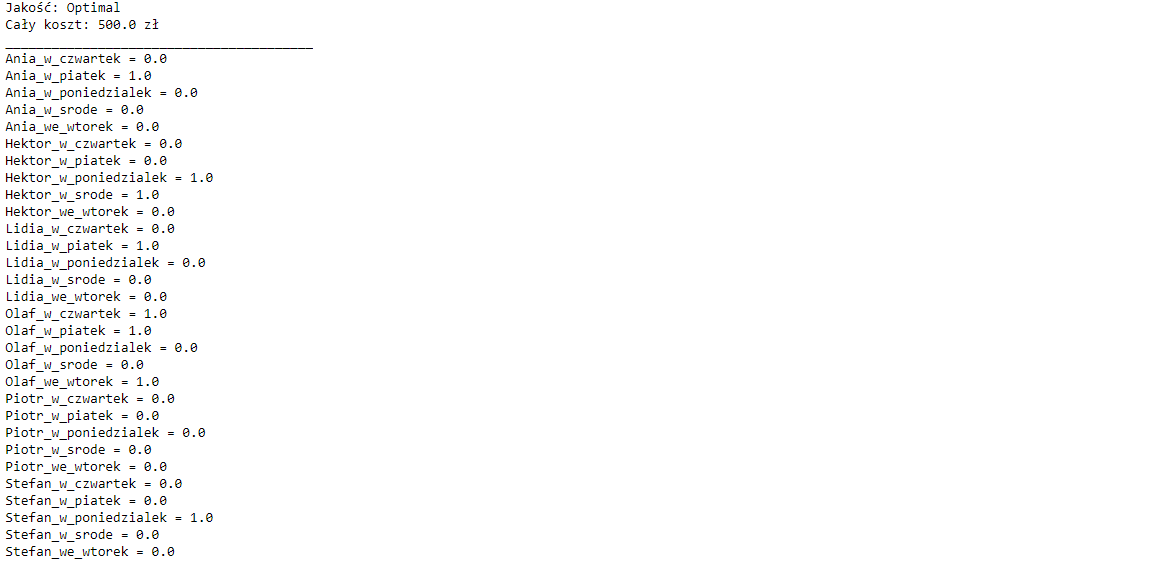